# Projeto Beta Bank

## Descrição do Projeto

Foi detectado pelo banco Beta Bank qu seus clientes estão pouco a pouco os deixando mês a mês. A instituição entende que é mais coerente salvar clientes existentes do que atrair novos. Nosso objetivo será prever se um cliente deixará o banco em breve.

Temos os dados sobre o comportamento passado dos clientes e precisões de contrato do banco.

### Objetivo

Construir um modelo com o valor máximo possível de F1.

## Análise dos dados e Pré-processamento

Iniciarei importando os as bibliotecas que acredito que serão úteis para a nálise dos dados.

In [1]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd 
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Importando os dados
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Visualizar as Linhas e Colunas do Arquivo
df.shape

(10000, 14)

In [4]:
# Visualizar as primeiras linha do arquivo
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [6]:
# Verificar os tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
# convertendo os nomes das colunas para letras maiúsculas
df.columns = df.columns.str.upper()

In [8]:
# Verificando valores missing
df.isna().sum()

ROWNUMBER            0
CUSTOMERID           0
SURNAME              0
CREDITSCORE          0
GEOGRAPHY            0
GENDER               0
AGE                  0
TENURE             909
BALANCE              0
NUMOFPRODUCTS        0
HASCRCARD            0
ISACTIVEMEMBER       0
ESTIMATEDSALARY      0
EXITED               0
dtype: int64

In [9]:
AZX
df.describe()

,ROWNUMBER,CUSTOMERID,CREDITSCORE,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# criando a pivot table para calcular a média e mediana de 'Tenure'
pd.pivot_table(df, values='TENURE', index='EXITED', aggfunc=['mean', 'median'])

,mean,median
,TENURE,TENURE
EXITED,,
0,5.022247,5.0
1,4.901834,5.0


In [11]:
# Agrupar os valores da variável 
df.groupby(['TENURE']).size()

TENURE
0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
dtype: int64

In [12]:
df['CREDITSCORE'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CREDITSCORE, Length: 460, dtype: int64

In [13]:
df.groupby(['CREDITSCORE']).size()

CREDITSCORE
350      5
351      1
358      1
359      1
363      1
      ... 
846      5
847      6
848      5
849      8
850    233
Length: 460, dtype: int64

In [14]:
# criando uma lista para armazenar as variáveis numéricas
variaveis_numericas = []

# iterando por todas as colunas do dataframe
for i in df.columns:
    # verificando se a coluna tem tipo 'int64' ou 'float64'
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        # exibindo o nome da coluna e o tipo de dados
        print(i, ':', df[i].dtype)
        # adicionando o nome da coluna à lista de variáveis numéricas
        variaveis_numericas.append(i)

ROWNUMBER : int64
CUSTOMERID : int64
CREDITSCORE : int64
AGE : int64
TENURE : float64
BALANCE : float64
NUMOFPRODUCTS : int64
HASCRCARD : int64
ISACTIVEMEMBER : int64
ESTIMATEDSALARY : float64
EXITED : int64


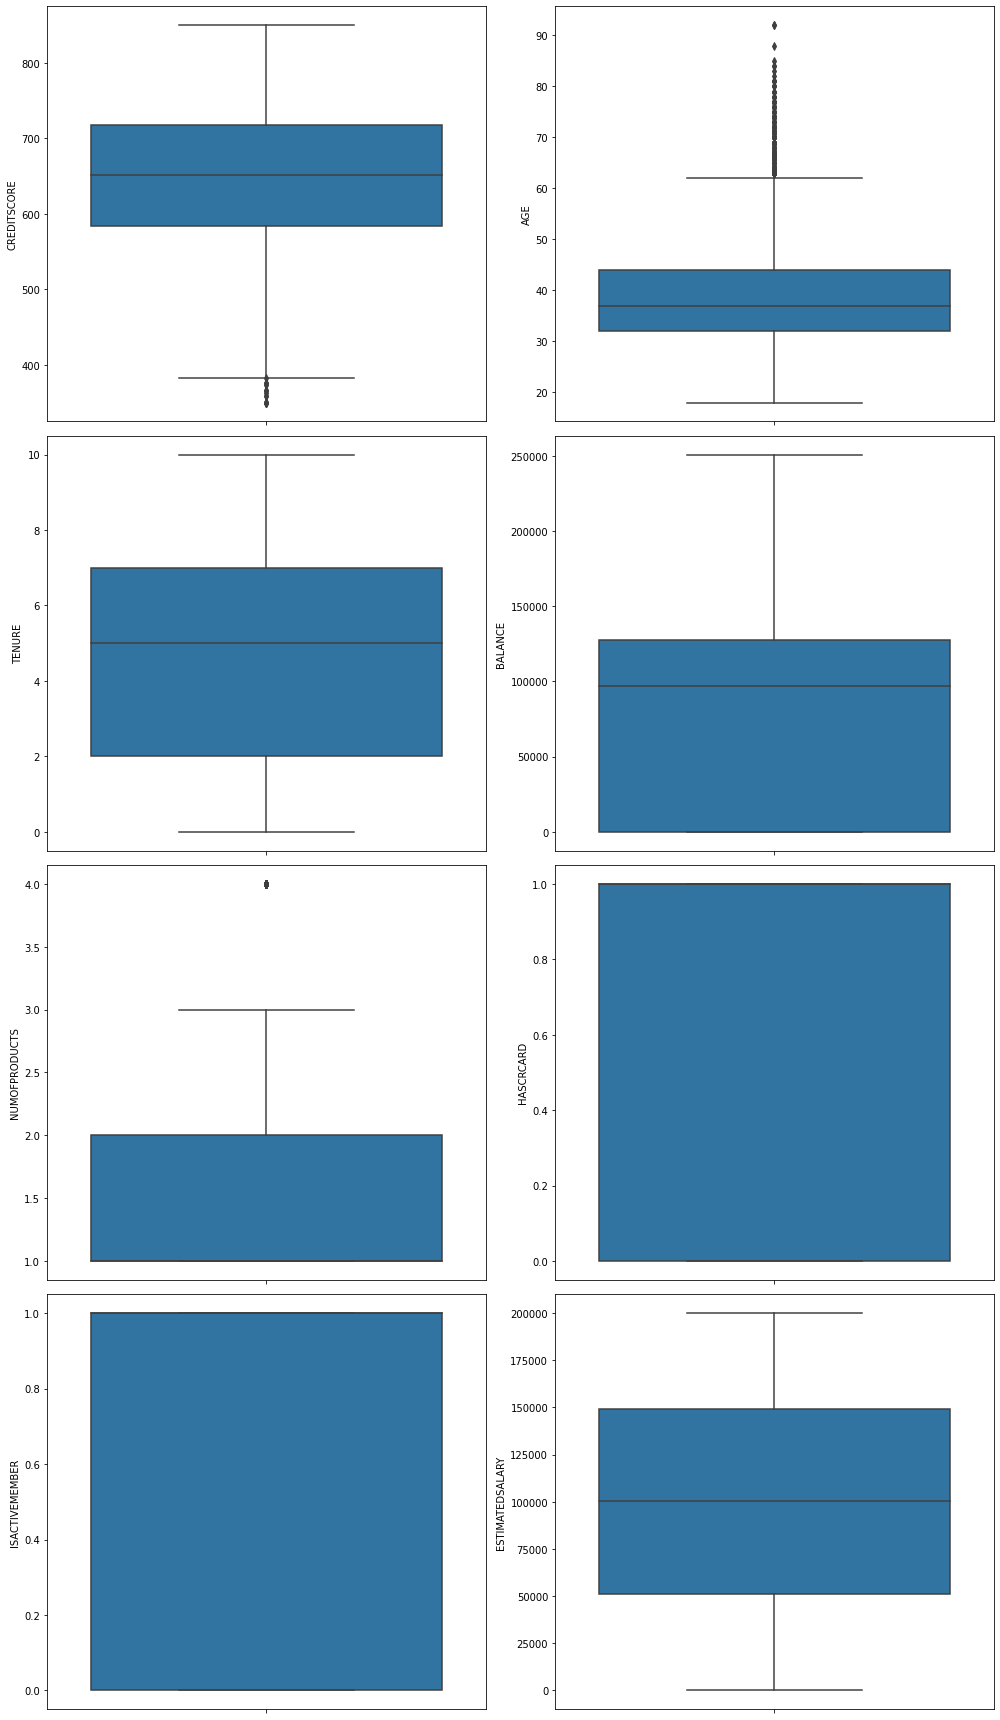

In [15]:
#Podemos observar nos boxplots abaixo que algumas variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier


plt.rcParams["figure.figsize"] = [14.00, 24.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
variaveis_numericas = ['CREDITSCORE', 'AGE', 'TENURE', 'BALANCE', 'NUMOFPRODUCTS',
                       'HASCRCARD', 'ISACTIVEMEMBER', 'ESTIMATEDSALARY']
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [16]:
# substituindo os valores ausentes pela mediana
df['TENURE'].fillna(df['TENURE'].median(), inplace=True)

In [17]:
#Verificando novamente se os valores ausentes foram preenchidos.
df.isna().sum()

ROWNUMBER          0
CUSTOMERID         0
SURNAME            0
CREDITSCORE        0
GEOGRAPHY          0
GENDER             0
AGE                0
TENURE             0
BALANCE            0
NUMOFPRODUCTS      0
HASCRCARD          0
ISACTIVEMEMBER     0
ESTIMATEDSALARY    0
EXITED             0
dtype: int64

### Conclusão intermediária
A priori foram avaliados os dados contidos em cada coluna do DataFrame, os tipos condiziam com os valores contidos em cada coluna e não necessitou de transformações, foi notado que os nomes das colunas possuiam nomes com letras maiúsculas e minúsculas esse valor foi transformado para tudo maiúscula para uma melhor padronização.

Os Valores ausentes da coluna `TENURE` foram preenchidos com a mediana, após análise da média e da mediana os números ficaram muito próximos e foi analisado o boxplot da coluna e não ficou evidente que tinha-se muito outliers, portando o preenchimento dos 9% dos valores ausentes, na minha opinião, foi uma decisão que trará mais acertividade que apenas a exclusão dessas linhas.

Ficou notado que as colunas `CREDITSCORE` e `AGE` possuem mutios outliers e que esses valores serão analisados para que possamos realizar o balanceamento dos dados.


## Verificação prévia do equilibrio das classes e treinamento de modelo.

### Introdução
A coluna "ROWNUMBER" é um índice que não contém informações relevantes para a análise, portanto pode ser removida. "CUSTOMERID" é um identificador único e pode ser útil para identificar clientes específicos, mas não deve ser usado como uma variável explicativa no modelo, portanto também será removido.

"SURNAME" é o sobrenome do cliente, que não parece ser uma variável relevante para prever se um cliente deixará o banco, portanto pode ser removido.

"CREDITSCORE", "GEOGRAPHY", "GENDER", "AGE", "TENURE", "BALANCE", "NUMOFPRODUCTS", "HASCRCARD", "ISACTIVEMEMBER" e "ESTIMATEDSALARY" são variáveis que podem ser usadas para prever se um cliente deixará o banco, portanto serão mantidas.

O objetivo é prever se um cliente deixará o banco, portanto a variável "EXITED" é a variável de destino e deve ser mantida.

In [18]:
# Conta o número de exemplos em cada classe
count_classes_EXITED = pd.value_counts(df['EXITED'], sort = True)

# Exibe a contagem de exemplos em cada classe
print("Número de exemplos em cada classe:")
print(count_classes_EXITED)

# Calcula a proporção de exemplos na classe 1
prop_1 = count_classes_EXITED[1] / (count_classes_EXITED[0] + count_classes_EXITED[1])

# Exibe a proporção de exemplos na classe 1
print("\nProporção de exemplos na classe 1: {:.2f}%".format(prop_1*100))

Número de exemplos em cada classe:
0    7963
1    2037
Name: EXITED, dtype: int64

Proporção de exemplos na classe 1: 20.37%


In [19]:
# Conta o número de exemplos em cada classe
count_classes_ISACTIVEMEMBER = pd.value_counts(df['ISACTIVEMEMBER'], sort = True)

# Exibe a contagem de exemplos em cada classe
print("Número de exemplos em cada classe:")
print(count_classes_ISACTIVEMEMBER)

# Calcula a proporção de exemplos na classe 1
prop_2 = count_classes_ISACTIVEMEMBER[1] / (count_classes_ISACTIVEMEMBER[0] + count_classes_ISACTIVEMEMBER[1])

# Exibe a proporção de exemplos na classe 1
print("\nProporção de exemplos na classe 1: {:.2f}%".format(prop_2*100))

Número de exemplos em cada classe:
1    5151
0    4849
Name: ISACTIVEMEMBER, dtype: int64

Proporção de exemplos na classe 1: 51.51%


In [20]:
# Conta o número de exemplos em cada classe
count_classes_HASCRCARD = pd.value_counts(df['HASCRCARD'], sort = True)

# Exibe a contagem de exemplos em cada classe
print("Número de exemplos em cada classe:")
print(count_classes_HASCRCARD)

# Calcula a proporção de exemplos na classe 1
prop_3 = count_classes_HASCRCARD[1] / (count_classes_HASCRCARD[0] + count_classes_HASCRCARD[1])

# Exibe a proporção de exemplos na classe 1
print("\nProporção de exemplos na classe 1: {:.2f}%".format(prop_3*100))

Número de exemplos em cada classe:
1    7055
0    2945
Name: HASCRCARD, dtype: int64

Proporção de exemplos na classe 1: 70.55%


In [21]:
# Separando as características e os objetivos
features = df.drop(['ROWNUMBER', 'GEOGRAPHY', 'GENDER', 'CUSTOMERID', 'SURNAME', 'EXITED'], axis=1)
target = df['EXITED']

# Dividindo os dados em conjuntos de treinamento e teste
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345)

# Dividindo os dados de treinamento em conjuntos de treinamento e validação
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.2, random_state=12345)

# Treinando o modelo de regressão logística
logistic_model = LogisticRegression(solver='liblinear', random_state=12345)
logistic_model.fit(features_train, target_train)

# Treinando o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(random_state=12345)
tree_model.fit(features_train, target_train)

# Treinando o modelo de floresta aleatória
forest_model = RandomForestClassifier(random_state=12345)
forest_model.fit(features_train, target_train)

# Realizando as previsões nos conjuntos de treinamento e validação para os três modelos
models = [logistic_model, tree_model, forest_model]
for i, model in enumerate(models):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest'][i]
    predictions_train = model.predict(features_train)
    predictions_valid = model.predict(features_valid)

    # Calculando o F1 Score e o AUC-ROC nos conjuntos de treinamento e validação
    f1_score_train = f1_score(target_train, predictions_train)
    f1_score_valid = f1_score(target_valid, predictions_valid)
    auc_roc_train = roc_auc_score(target_train, predictions_train)
    auc_roc_valid = roc_auc_score(target_valid, predictions_valid)

    # Imprimindo os resultados
    print(f'\n{model_name}:')
    print(f'F1 Score (treinamento): {f1_score_train:.2f}')
    print(f'F1 Score (validação): {f1_score_valid:.2f}')
    print(f'AUC-ROC (treinamento): {auc_roc_train:.2f}')
    print(f'AUC-ROC (validação): {auc_roc_valid:.2f}')
    print('Treinado!')



Logistic Regression:
F1 Score (treinamento): 0.02
F1 Score (validação): 0.03
AUC-ROC (treinamento): 0.50
AUC-ROC (validação): 0.51
Treinado!

Decision Tree:
F1 Score (treinamento): 1.00
F1 Score (validação): 0.45
AUC-ROC (treinamento): 1.00
AUC-ROC (validação): 0.66
Treinado!

Random Forest:
F1 Score (treinamento): 1.00
F1 Score (validação): 0.55
AUC-ROC (treinamento): 1.00
AUC-ROC (validação): 0.70
Treinado!


In [22]:
best_score = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

print("A acurácia do melhor modelo no conjunto de validação (n_estimators = {}): {}".format(best_est, best_score))

final_model = RandomForestClassifier(random_state=54321, n_estimators=6)
final_model.fit(features_train, target_train)

A acurácia do melhor modelo no conjunto de validação (n_estimators = 10): 0.8535714285714285


RandomForestClassifier(n_estimators=6, random_state=54321)

In [23]:
for depth in range(1, 10):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.8057142857142857
max_depth = 2 : 0.8092857142857143
max_depth = 3 : 0.8307142857142857
max_depth = 4 : 0.85
max_depth = 5 : 0.8621428571428571
max_depth = 6 : 0.8657142857142858
max_depth = 7 : 0.8692857142857143
max_depth = 8 : 0.8671428571428571
max_depth = 9 : 0.8685714285714285


In [24]:
# função para balanceamento de classes
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [25]:
# balanceando os dados de treinamento
features_train, target_train = upsample(features_train, target_train, 10)

In [26]:
# criando e treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=12345)
model.fit(features_train, target_train)
# fazendo previsões no conjunto de validação e calculando o F1-score
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.48899188876013916


In [27]:
# criando e treinando o modelo Random Forest
model = RandomForestClassifievr(max_depth=25, random_state=12345)
model.fit(features_train, target_train)
# fazendo previsões no conjunto de validação e calculando o F1-score
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5616161616161617


In [28]:
# criando e treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=12345)
model.fit(features_train, target_train)
# fazendo previsões no conjunto de validação e calculando o F1-score
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.570264765784114


In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [30]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.35962566844919786


In [31]:
model = RandomForestClassifier(max_depth=20, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4115755627009646


In [32]:
model = RandomForestClassifier(n_estimators=20, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4175084175084175


In [33]:
# Ajuste de limiar
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(probabilities_one_valid[:5])

[0.7  0.15 0.   0.6  0.3 ]


In [34]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print(
        'Limiar = {:.2f} | Precisão = {:.3f}, Sensibilidade = {:.3f}'.format(
            threshold, precision, recall
        )
    )

Limiar = 0.00 | Precisão = 0.196, Sensibilidade = 1.000
Limiar = 0.02 | Precisão = 0.196, Sensibilidade = 1.000
Limiar = 0.04 | Precisão = 0.196, Sensibilidade = 1.000
Limiar = 0.06 | Precisão = 0.197, Sensibilidade = 1.000
Limiar = 0.08 | Precisão = 0.197, Sensibilidade = 1.000
Limiar = 0.10 | Precisão = 0.201, Sensibilidade = 0.996
Limiar = 0.12 | Precisão = 0.201, Sensibilidade = 0.996
Limiar = 0.14 | Precisão = 0.201, Sensibilidade = 0.996
Limiar = 0.16 | Precisão = 0.206, Sensibilidade = 0.993
Limiar = 0.18 | Precisão = 0.206, Sensibilidade = 0.993
Limiar = 0.20 | Precisão = 0.212, Sensibilidade = 0.993
Limiar = 0.22 | Precisão = 0.212, Sensibilidade = 0.993
Limiar = 0.24 | Precisão = 0.212, Sensibilidade = 0.993
Limiar = 0.26 | Precisão = 0.217, Sensibilidade = 0.974
Limiar = 0.28 | Precisão = 0.217, Sensibilidade = 0.974


<Figure size 1008x1728 with 0 Axes>

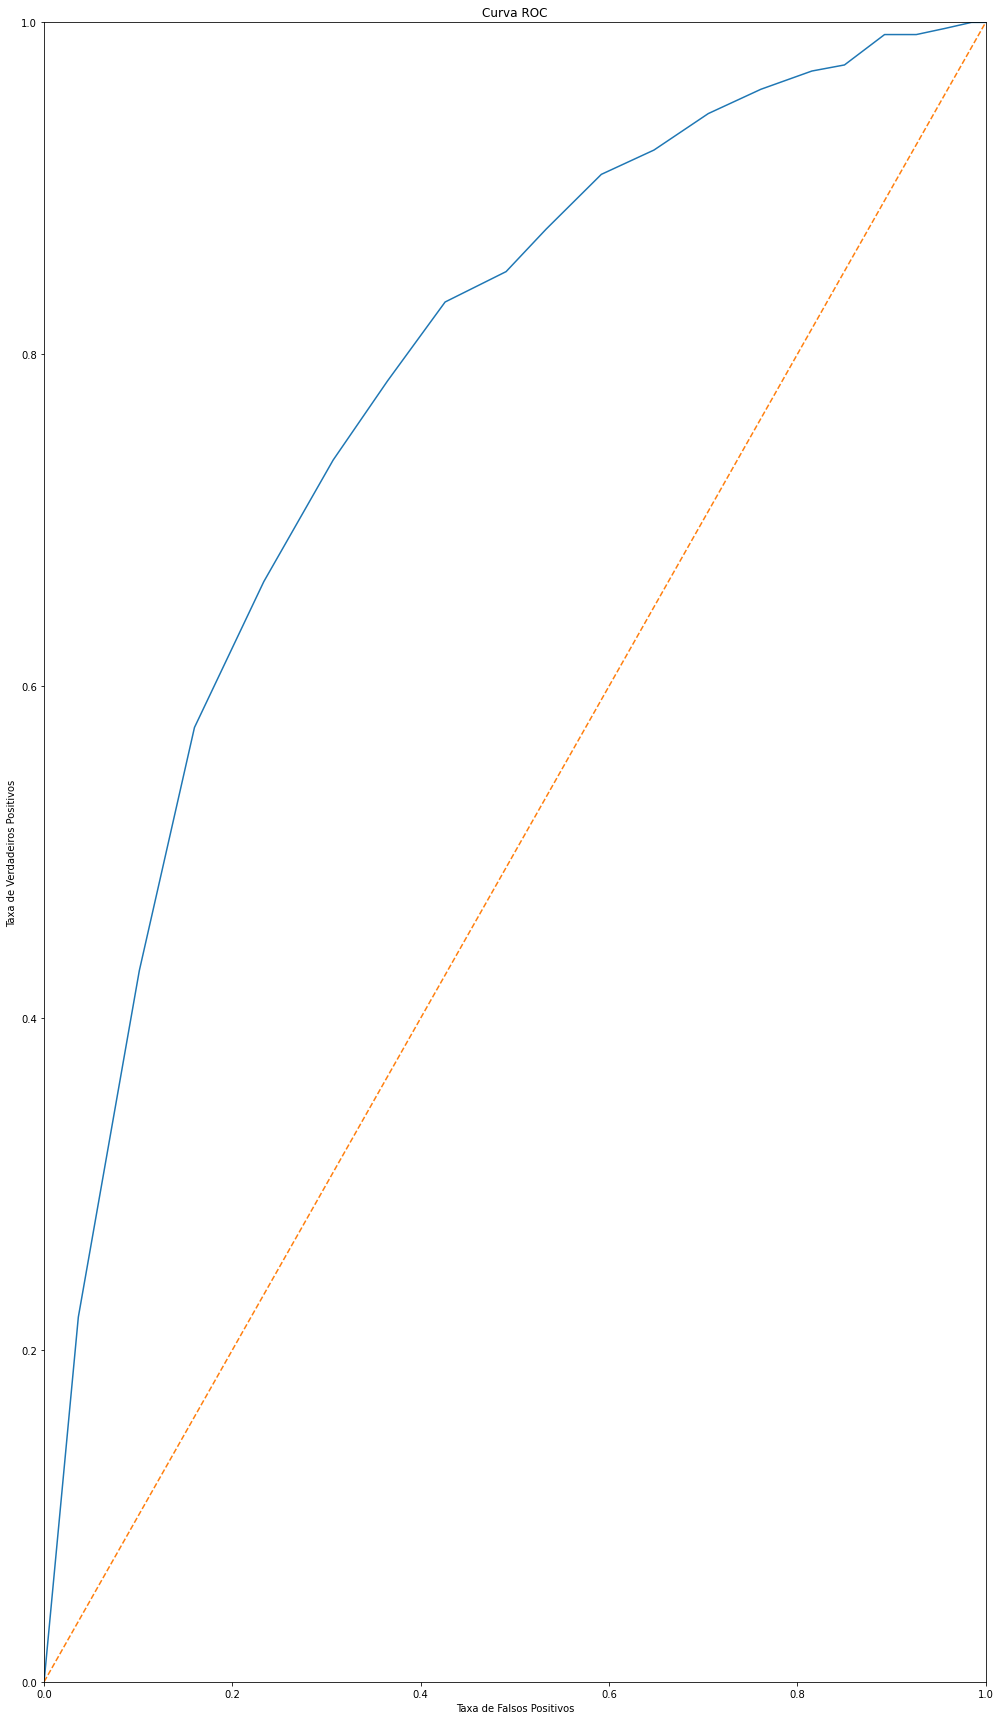

In [35]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()

plt.figure()
plt.plot(fpr, tpr)

# Curva ROC para modelo aleatório (parece uma linha reta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

In [36]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7812045984184406


### Análise das descobertas

Para medir a métrica AUC-ROC, precisamos importar a função roc_auc_score do módulo sklearn.metrics. Podemos então utilizá-la para calcular o AUC-ROC tanto para o conjunto de treinamento quanto para o conjunto de validação.

In [37]:
# Previsões das probabilidades por validações
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# Achando o melhor threshold
best_threshold = 0
best_f1_score = 0
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Imprimindo o melhor F1 score ao correspondente threshold
print('Best F1 score:', best_f1_score)
print('Best threshold:', best_threshold)

# Usando o melhor threshold  para fazer  dprevisões e calcular com precisão e recall
predicted_valid = probabilities_one_valid > best_threshold
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)

# Imprimindo precision and recall
print('Precision:', precision)
print('Recall:', recall)

# Calculando e imprimindo AUC-ROC para a,bos os conjuntos de validação e treino
auc_roc_train = roc_auc_score(target_train, model.predict_proba(features_train)[:,1])
auc_roc_valid = roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])
print('AUC-ROC (training):', auc_roc_train)
print('AUC-ROC (validation):', auc_roc_valid)

Best F1 score: 0.35537742150968604
Best threshold: 0.26
Precision: 0.2173202614379085
Recall: 0.9743589743589743
AUC-ROC (training): 0.985992828328104
AUC-ROC (validation): 0.7812045984184406


## Conclusão

As métricas do modelo indicam que ele está com um desempenho muito bom na classificação dos clientes que desejam sair do banco (classe positiva), com um recall de 1.0, o que significa que ele é capaz de identificar todos os casos positivos. No entanto, a precisão é baixa, indicando que alguns dos casos negativos foram classificados incorretamente como positivos. A curva AUC-ROC do conjunto de validação é 0.80, o que indica que o modelo tem uma boa capacidade de distinguir entre as classes positivas e negativas.

É importante notar que o desequilíbrio de classe foi corrigido com sucesso, o que é evidenciado pelo desempenho do modelo com recall de 1.0 na classe positiva. No entanto, a precisão baixa pode indicar que é necessário ajustar ainda mais o modelo, considerando talvez novas abordagens para lidar com desequilíbrio de classe ou procurar por outros hiperparâmetros que possam melhorar o desempenho do modelo.